In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import csv
import re
from sklearn.preprocessing import MaxAbsScaler
%matplotlib inline

In [2]:
f1 = 'anime.csv'
f2 = 'rating.csv'

In [61]:
df = pd.read_csv(f1)
rf = pd.read_csv(f2)

In [62]:
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266


In [63]:
df.shape

(12294, 7)

In [5]:
rf.head()

,user_id,anime_id,rating
0,1,20,-1
1,1,24,-1
2,1,79,-1
3,1,226,-1
4,1,241,-1


In [60]:
rf.shape

(7813737, 3)

In [6]:
df.anime_id.unique()

array([32281,  5114, 28977, ...,  5621,  6133, 26081], dtype=int64)

In [7]:
df.episodes.unique()

array(['1', '64', '51', '24', '10', '148', '110', '13', '201', '25', '22',
       '75', '4', '26', '12', '27', '43', '74', '37', '2', '11', '99',
       'Unknown', '39', '101', '47', '50', '62', '33', '112', '23', '3',
       '94', '6', '8', '14', '7', '40', '15', '203', '77', '291', '120',
       '102', '96', '38', '79', '175', '103', '70', '153', '45', '5', '21',
       '63', '52', '28', '145', '36', '69', '60', '178', '114', '35', '61',
       '34', '109', '20', '9', '49', '366', '97', '48', '78', '358', '155',
       '104', '113', '54', '167', '161', '42', '142', '31', '373', '220',
       '46', '195', '17', '1787', '73', '147', '127', '16', '19', '98',
       '150', '76', '53', '124', '29', '115', '224', '44', '58', '93',
       '154', '92', '67', '172', '86', '30', '276', '59', '72', '330',
       '41', '105', '128', '137', '56', '55', '65', '243', '193', '18',
       '191', '180', '91', '192', '66', '182', '32', '164', '100', '296',
       '694', '95', '68', '117', '151', '130',

In [8]:
df["episodes"] = df["episodes"].map(lambda x:np.nan if x=="Unknown" else x)
df["episodes"].fillna(df['episodes'].median() ,inplace = True)
df.episodes.unique()

array(['1', '64', '51', '24', '10', '148', '110', '13', '201', '25', '22',
       '75', '4', '26', '12', '27', '43', '74', '37', '2', '11', '99', 2.0,
       '39', '101', '47', '50', '62', '33', '112', '23', '3', '94', '6',
       '8', '14', '7', '40', '15', '203', '77', '291', '120', '102', '96',
       '38', '79', '175', '103', '70', '153', '45', '5', '21', '63', '52',
       '28', '145', '36', '69', '60', '178', '114', '35', '61', '34',
       '109', '20', '9', '49', '366', '97', '48', '78', '358', '155',
       '104', '113', '54', '167', '161', '42', '142', '31', '373', '220',
       '46', '195', '17', '1787', '73', '147', '127', '16', '19', '98',
       '150', '76', '53', '124', '29', '115', '224', '44', '58', '93',
       '154', '92', '67', '172', '86', '30', '276', '59', '72', '330',
       '41', '105', '128', '137', '56', '55', '65', '243', '193', '18',
       '191', '180', '91', '192', '66', '182', '32', '164', '100', '296',
       '694', '95', '68', '117', '151', '130', '87',

In [9]:
rf.rating.unique()

array([-1, 10,  8,  6,  9,  7,  3,  5,  4,  1,  2], dtype=int64)

In [10]:
rf["rating"] = rf["rating"].map(lambda x:np.nan if x==-1 else x)

rf.rating.unique()

array([ nan,  10.,   8.,   6.,   9.,   7.,   3.,   5.,   4.,   1.,   2.])

In [11]:
fd = df.anime_id.unique()
np.sort(fd)

array([    1,     5,     6, ..., 34522, 34525, 34527], dtype=int64)

In [12]:
fr = rf.anime_id.unique()
np.sort(fr)

array([    1,     5,     6, ..., 34475, 34476, 34519], dtype=int64)

In [13]:
print len(fr)
print len(fd)

11200
12294


In [14]:
nrf = rf.dropna(axis=0, how='any')

In [15]:
nrf.shape

(6337241, 3)

In [16]:
rf.shape

(7813737, 3)

In [17]:
nrf.rating.unique()

array([ 10.,   8.,   6.,   9.,   7.,   3.,   5.,   4.,   1.,   2.])

In [79]:
rat = nrf['rating']

(array([   16649.,    23150.,    41453.,   104291.,   282806.,   637775.,
         1375287.,  1646019.,  2209811.]),
 array([  1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.]),
 <a list of 9 Patch objects>)

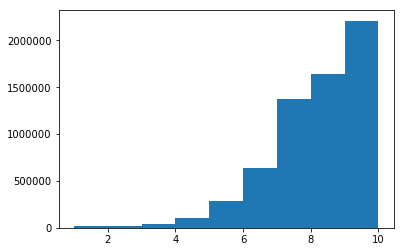

In [80]:
plt.hist(rat, bins=np.arange(rat.min(), rat.max()+1))

In [18]:
def convert(string):
    try:
        string = float(string)
    except:
        string = string
    return string

In [19]:
df['episodes']=df['episodes'].map(convert)

In [20]:
df['rating']=df['rating'].map(convert)

In [21]:
newdf = pd.concat([df["genre"].str.get_dummies(sep=","),pd.get_dummies(df[["type"]]),df[["rating"]],df[["members"]],df["episodes"]],axis=1)

In [22]:
asx = newdf.dropna(axis = 0 , how ='any')

In [23]:
asx.describe()

,Adventure,Cars,Comedy,Dementia,Demons,Drama,Ecchi,Fantasy,Game,Harem,...,Yaoi,type_Movie,type_Music,type_ONA,type_OVA,type_Special,type_TV,rating,members,episodes
count,12064.000000,12064.000000,12064.000000,12064.000000,12064.000000,12064.000000,12064.000000,12064.000000,12064.000000,12064.000000,...,12064.000000,12064.000000,12064.000000,12064.000000,12064.000000,12064.000000,12064.000000,12064.000000,1.206400e+04,12064.000000
mean,0.072198,0.003067,0.118369,0.002735,0.016827,0.083140,0.046751,0.145723,0.011605,0.022546,...,0.000166,0.190401,0.040451,0.054045,0.272298,0.138511,0.304294,6.473902,1.827952e+04,12.284483
std,0.258827,0.055298,0.323058,0.052232,0.128628,0.276105,0.211113,0.352843,0.107103,0.148458,...,0.012875,0.392634,0.197023,0.226116,0.445161,0.345450,0.460127,1.026746,5.527578e+04,46.661240
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.670000,1.200000e+01,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.880000,2.210000e+02,1.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.570000,1.539000e+03,2.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,7.180000,9.485500e+03,12.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10.000000,1.013917e+06,1818.000000


In [24]:
newdf.columns

Index([u' Adventure', u' Cars', u' Comedy', u' Dementia', u' Demons',
       u' Drama', u' Ecchi', u' Fantasy', u' Game', u' Harem', u' Hentai',
       u' Historical', u' Horror', u' Josei', u' Kids', u' Magic',
       u' Martial Arts', u' Mecha', u' Military', u' Music', u' Mystery',
       u' Parody', u' Police', u' Psychological', u' Romance', u' Samurai',
       u' School', u' Sci-Fi', u' Seinen', u' Shoujo', u' Shoujo Ai',
       u' Shounen', u' Shounen Ai', u' Slice of Life', u' Space', u' Sports',
       u' Super Power', u' Supernatural', u' Thriller', u' Vampire', u' Yaoi',
       u' Yuri', u'Action', u'Adventure', u'Cars', u'Comedy', u'Dementia',
       u'Demons', u'Drama', u'Ecchi', u'Fantasy', u'Game', u'Harem', u'Hentai',
       u'Historical', u'Horror', u'Josei', u'Kids', u'Magic', u'Martial Arts',
       u'Mecha', u'Military', u'Music', u'Mystery', u'Parody', u'Police',
       u'Psychological', u'Romance', u'Samurai', u'School', u'Sci-Fi',
       u'Seinen', u'Shoujo', u'S

In [25]:
df["name"] = df["name"].map(lambda name:re.sub('[^A-Za-z0-9]+', " ", name))

In [26]:
df.head()

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa,"Drama, Romance, School, Supernatural",Movie,1.0,9.37,200630
1,5114,Fullmetal Alchemist Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64.0,9.26,793665
2,28977,Gintama,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51.0,9.25,114262
3,9253,Steins Gate,"Sci-Fi, Thriller",TV,24.0,9.17,673572
4,9969,Gintama 039,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51.0,9.16,151266


In [27]:
max_abs_scaler = MaxAbsScaler()
asx = max_abs_scaler.fit_transform(asx)

In [28]:
from sklearn.neighbors import NearestNeighbors

In [29]:
nbrs = NearestNeighbors(n_neighbors=5, algorithm='ball_tree').fit(asx)

In [30]:
distances, indices = nbrs.kneighbors(asx)

In [31]:
def idee_anime(x):
    return df[df["name"]== x].index.tolist()[0]

In [32]:
idee_anime('Barakamon')

99

In [33]:
all_names = list(df.name.values)

In [34]:
def get_name(partial):
    for name in all_names:
        if partial in name:
            print(name,all_names.index(name))

In [35]:
def print_similar(query=None,id=None):
    if id:
        for id in indices[id][1:]:
            print(df.iloc[id]["name"]),(df.iloc[id]['anime_id'])
    if query:
        found_id = get_name(query)
        for id in indices[found_id][1:]:
            print(df.iloc[id]["name"]),(df.iloc[id]['anime_id'])

In [36]:
get_name('Naruto')

('Boruto Naruto the Movie', 486)
('Naruto Shippuuden', 615)
('The Last Naruto the Movie', 719)
('Naruto Shippuuden Movie 6 Road to Ninja', 784)
('Naruto', 841)
('Boruto Naruto the Movie Naruto ga Hokage ni Natta Hi', 1103)
('Naruto Shippuuden Movie 5 Blood Prison', 1237)
('Naruto x UT', 1343)
('Naruto Shippuuden Movie 4 The Lost Tower', 1472)
('Naruto Shippuuden Movie 3 Hi no Ishi wo Tsugu Mono', 1573)
('Naruto Shippuuden Movie 1', 1827)
('Naruto Shippuuden Movie 2 Kizuna', 1828)
('Naruto Shippuuden Shippuu quot Konoha Gakuen quot Den', 2374)
('Naruto Honoo no Chuunin Shiken Naruto vs Konohamaru ', 2416)
('Naruto SD Rock Lee no Seishun Full Power Ninden', 2457)
('Naruto Shippuuden Sunny Side Battle', 2458)
('Naruto Movie 1 Dai Katsugeki Yuki Hime Shinobu Houjou Dattebayo ', 2756)
('Naruto Soyokazeden Movie Naruto to Mashin to Mitsu no Onegai Dattebayo ', 2997)
('Naruto Movie 2 Dai Gekitotsu Maboroshi no Chiteiiseki Dattebayo ', 3449)
('Naruto Dai Katsugeki Yuki Hime Shinobu Houjou Datt

In [82]:
print_similar(id = 1828)

Street Fighter II: The Movie 1362
Huang Feihong Yong Chuang Tianxia 30268
The Snack World 32593
Bleach Movie 2: The DiamondDust Rebellion - Mou Hitotsu no Hyourinmaru 2889


In [39]:
nrf.columns

Index([u'user_id', u'anime_id', u'rating'], dtype='object')

In [40]:
nrf.reset_index(inplace = True )

In [41]:
prf = nrf.pivot_table(index = 'user_id', columns ='anime_id', values = 'rating', aggfunc = 'mean').fillna(0)

In [42]:
prf.head()

anime_id,1,5,6,7,8,15,16,17,18,19,...,34238,34239,34240,34252,34283,34324,34325,34349,34367,34475
user_id,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,8.0,0.0,0.0,6.0,0.0,6.0,6.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
Pt = prf.as_matrix()

In [44]:
Pt

array([[  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       ..., 
       [  0.,   0.,   0., ...,   0.,   0.,   0.],
       [ 10.,  10.,  10., ...,   0.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,   0.]])

In [45]:
user_mean = np.mean(Pt, axis = 1)

In [46]:
Ptmean = Pt - user_mean.reshape(-1, 1)

In [47]:
Ptmean

array([[ -4.02941473e-03,  -4.02941473e-03,  -4.02941473e-03, ...,
         -4.02941473e-03,  -4.02941473e-03,  -4.02941473e-03],
       [ -1.00735368e-03,  -1.00735368e-03,  -1.00735368e-03, ...,
         -1.00735368e-03,  -1.00735368e-03,  -1.00735368e-03],
       [ -7.01118163e-02,  -7.01118163e-02,  -7.01118163e-02, ...,
         -7.01118163e-02,  -7.01118163e-02,  -7.01118163e-02],
       ..., 
       [ -1.00735368e-03,  -1.00735368e-03,  -1.00735368e-03, ...,
         -1.00735368e-03,  -1.00735368e-03,  -1.00735368e-03],
       [  9.84587489e+00,   9.84587489e+00,   9.84587489e+00, ...,
         -1.54125113e-01,  -1.54125113e-01,  -1.54125113e-01],
       [ -1.81323663e-03,  -1.81323663e-03,  -1.81323663e-03, ...,
         -1.81323663e-03,  -1.81323663e-03,  -1.81323663e-03]])

In [48]:
from scipy.sparse.linalg import svds

In [49]:
U, sigma, Vt = svds(Ptmean, k = 50)

In [50]:
sigma = np.diag(sigma)

In [51]:
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) + user_mean.reshape(-1, 1)

In [52]:
preds_df = pd.DataFrame(all_user_predicted_ratings, columns = prf.columns)

In [53]:
preds_df.head()

anime_id,1,5,6,7,8,15,16,17,18,19,...,34238,34239,34240,34252,34283,34324,34325,34349,34367,34475
0,0.002306,0.014578,-0.083352,0.004708,-0.022710,0.059466,0.232322,0.018805,0.194276,-0.221527,...,0.004407,-0.001780,0.030275,-0.000833,-0.000105,0.000812,-0.000270,0.000385,-0.000818,-0.000778
1,0.050180,0.021032,-0.086023,0.008975,-0.001642,0.127829,-0.038173,0.041363,0.085634,0.023456,...,0.003023,-0.001422,-0.005380,-0.001798,-0.000689,-0.002321,-0.001211,-0.001777,-0.001660,-0.002036
2,-1.345952,-0.915825,-0.817502,-0.143544,-0.025295,0.368651,0.172969,0.088800,0.009949,-0.049407,...,0.009475,-0.005223,0.399049,-0.007122,-0.001688,-0.001263,0.024510,-0.005979,-0.007080,-0.002125
3,1.858856,0.558372,3.426861,-0.052840,0.438827,3.332342,1.125798,1.022065,1.713151,2.553547,...,0.008300,-0.016827,0.225034,-0.015890,-0.010128,-0.005449,0.007346,-0.017286,-0.015813,-0.014836
4,-0.198755,-0.212025,0.355089,-0.140779,0.025105,0.612440,0.041398,0.252502,0.280293,1.122737,...,0.043114,-0.023692,0.682685,-0.020941,-0.008229,-0.011214,0.004809,-0.013440,-0.012636,-0.022405


In [54]:
def recommend(userID,num_recommendations=5):
    
    user_row_number = userID - 1 
    sorted_user_predictions = preds_df.iloc[user_row_number].sort_values(ascending=False)
    
    user_data = nrf[nrf.user_id == (userID)]
    user_full = (user_data.merge(df, how = 'left', left_on = 'anime_id', right_on ='anime_id').
                     sort_values(['rating_x'], ascending=False))
                 
    print 'User {0} has already rated {1} animes.'.format(userID, user_full.shape[0])
    print 'Recommending the following {0} animes not already rated.'.format(num_recommendations)
                 
    
    recommendations = (df[~df['anime_id'].isin(user_full['anime_id'])].
         merge(pd.DataFrame(sorted_user_predictions).reset_index(), how = 'left',
               left_on = 'anime_id',
               right_on = 'anime_id').
         rename(columns = {user_row_number: 'Predictions'}).
         sort_values('Predictions', ascending = False).
                       iloc[:num_recommendations, :-1]
    
                      )

    return user_full, recommendations

In [55]:
a_r, pr = recommend(153)

User 153 has already rated 42 animes.
Recommending the following 5 animes not already rated.


In [56]:
a_r.head()

,index,user_id,anime_id,rating_x,name,genre,type,episodes,rating_y,members
22,11986,153,9989,10.0,Ano Hi Mita Hana no Namae wo Bokutachi wa Mada...,"Drama, Slice of Life, Supernatural",TV,11.0,8.62,463835
40,12004,153,14833,10.0,Maoyuu Maou Yuusha,"Adventure, Demons, Fantasy, Historical, Romance",TV,12.0,7.44,164445
24,11988,153,10213,9.0,Maji de Watashi ni Koi Shinasai,"Comedy, Ecchi, Harem, Martial Arts, Romance, S...",TV,12.0,7.02,116683
25,11989,153,10456,9.0,Kyoukaisenjou no Horizon,"Action, Fantasy",TV,13.0,7.29,90977
18,11982,153,9041,9.0,IS Infinite Stratos,"Action, Comedy, Harem, Mecha, Sci-Fi",TV,12.0,7.12,254543


In [57]:
pr.head()

,anime_id,name,genre,type,episodes,rating,members
14,199,Sen to Chihiro no Kamikakushi,"Adventure, Drama, Supernatural",Movie,1.0,8.93,466254
102,205,Samurai Champloo,"Action, Adventure, Comedy, Historical, Samurai...",TV,26.0,8.50,390076
440,22319,Tokyo Ghoul,"Action, Drama, Horror, Mystery, Psychological,...",TV,12.0,8.07,618056
748,226,Elfen Lied,"Action, Drama, Horror, Psychological, Romance,...",TV,13.0,7.85,623511
34,431,Howl no Ugoku Shiro,"Adventure, Drama, Fantasy, Romance",Movie,1.0,8.74,333186
